In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import h5py as h5

sys.path.append('../common_code')

#Custom imports
# for color map
import seaborn as sns
# for reading datafiles 
import pandas as pd
import math

# import script that has formation channel classification functions:
from PostProcessingScripts import * 
from formation_channels import *  # downloads the functions to calculate formation channels 


from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd

channelColorDict_lighter = {'classic':adjust_lightness(color='#118AB2', amount=1.6),'stable B no CEE':adjust_lightness(color='orange', amount=1.4), 'immediate CE':adjust_lightness(color='#EF476F', amount=1.2),\
                            r'double-core CE':adjust_lightness(color='#073B4C', amount=1.8), 'other':adjust_lightness(color='gray', amount=1.5),  'vi':adjust_lightness(color='cyan', amount=1.5), 'vii':adjust_lightness(color='#FFD166', amount=1.2)}

adjustedChannelList = ['classic', 'stable B no CEE', 'immediate CE',  r'double-core CE', 'other', 'vii', 'vi'] # channels to plot 




See https://github.com/UoA-Stars-And-Supernovae/transient_rates_from_cosmological_simulations/tree/main

In [4]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from scipy import integrate

In [13]:

path = "/Volumes/SimonsFoundation/GROWLcatalog/Briel21"

In [14]:
data = h5py.File(f"{path}/data.h5", "r")
event_rates = data['event_rates']
observations = data['observations']

In [15]:
h = event_rates.attrs['h']
omega_M = event_rates.attrs['omega_M']
omega_L = event_rates.attrs['omega_L']
redshift = event_rates.attrs['event_redshift'][:-1]
SFH_names = ["empirical", "millimillennium", "EAGLE", "TNG"]




In [25]:
print(data.keys())

<KeysViewHDF5 ['DTD', 'SFH', 'SFR_metallicity_dist', 'event_rates', 'observations']>


In [17]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 22})
plt.rcParams['axes.linewidth'] = 2

colours = {"empirical":"#e7298a", "millimillennium":"#1b9e77", "EAGLE":"#7570b3", "TNG":"#d95f02"}

def set_axis(ax):
    # Set the minor and major ticks on both axes
    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
    ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
    # set the location of the ticks
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))

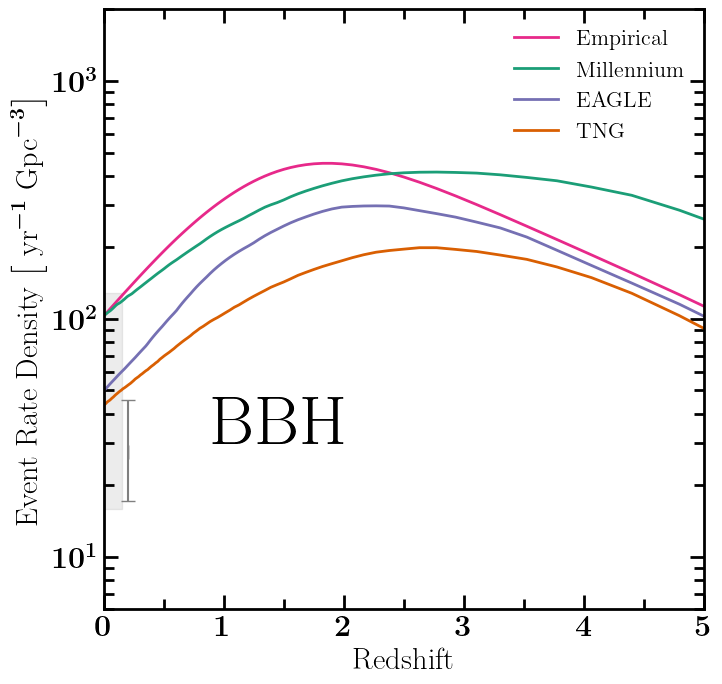

In [19]:
#obs_path = "../data/observations/BBH.csv"
#obs = pd.read_csv(obs_path, delimiter=",")
fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes([0, 0, 1, 1])

set_axis(ax)

for SFH in SFH_names:
    if SFH == "empirical":
        ax.plot(redshift, np.sum(event_rates[SFH]["BBH"], axis=0), label="Empirical", color=colours[SFH], lw=2)
    elif SFH == "millimillennium":
        ax.plot(redshift, np.sum(event_rates[SFH]["BBH"], axis=0), label="Millennium", color=colours[SFH], lw=2)
    else:
        ax.plot(redshift, np.sum(event_rates[SFH]["BBH"], axis=0), label=SFH, color=colours[SFH], lw=2)


    
ax.legend(frameon=False, fontsize=16, loc=1)
ax.set_xlabel("Redshift")
ax.set_ylabel(r"Event Rate Density $\left[\textrm{ yr}^{-1} \textrm{ Gpc}^{-3}\right]$")
ax.set_yscale("log")
ax.set_xlim(0,5)
ax.set_ylim(6e0, 2e3)



obs = observations['BBH']


# Non-evolving merger rate
top = np.max(obs['rate'][1:4]+obs['upper_rate'][1:4])
bottom = np.min(obs['rate'][1:4]-obs['lower_rate'][1:4])

ax.fill_between([0,0.15], 
                (top)*h**3,
                (bottom)*h**3, 
                alpha=0.15, 
                color="grey")

# Evolving merger rate

top = np.argmax(obs['rate'][-3:]+obs['upper_rate'][-3:])
bottom = np.argmin(obs['rate'][-3:]-obs['lower_rate'][-3:])

mean_rate = (obs['rate'][-3:][top]-obs['lower_rate'][-3:][top] + obs['rate'][bottom]+obs['upper_rate'][-3:][bottom])/2
to_top = obs['rate'][-3:][top]+obs['upper_rate'][-3:][top] - mean_rate
to_bottom = mean_rate - (obs['rate'][-3:][bottom]-obs['lower_rate'][-3:][bottom])

ax.errorbar(0.2,
            mean_rate*h**3, 
            xerr=[[0],[0]],
            yerr=[[to_bottom*h**3], [to_top*h**3]],
            fmt="",
            ms=8,
            color="grey",
            capsize=5)


ax.text(0.9, 3e1, r"BBH", fontsize=50)
plt.show() 
#  plt.savefig("images/png/BHBH_obs.png", dpi=150, bbox_inches='tight')
# plt.savefig("images/pdf/BHBH_obs.pdf", bbox_inches='tight')

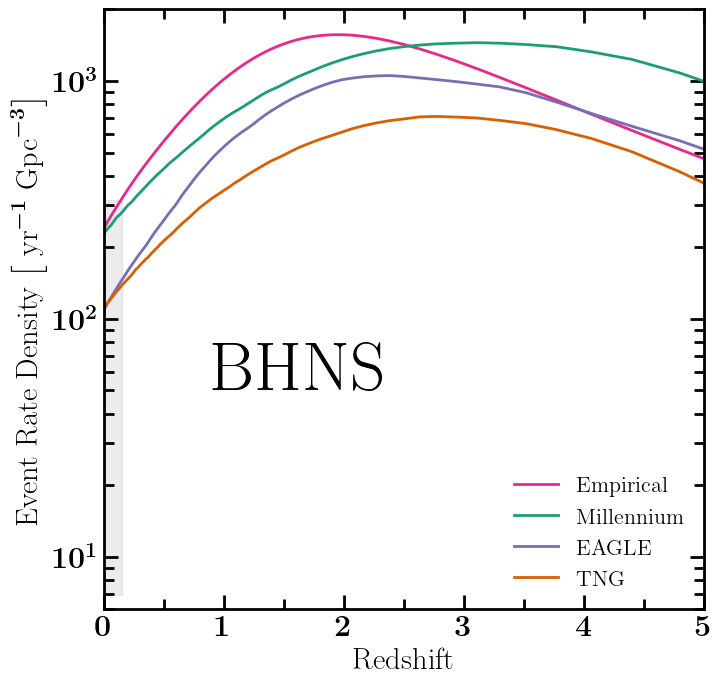

In [27]:
#obs_path = "../data/observations/BHNS.csv"
#obs = pd.read_csv(obs_path, delimiter=",")
fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes([0, 0, 1, 1])

set_axis(ax)

for SFH in SFH_names:
    if SFH == "empirical":
        ax.plot(redshift, np.sum(event_rates[SFH]["BHNS"], axis=0), label="Empirical", color=colours[SFH], lw=2)
    elif SFH == "millimillennium":
        ax.plot(redshift, np.sum(event_rates[SFH]["BHNS"], axis=0), label="Millennium", color=colours[SFH], lw=2)
    else:
        ax.plot(redshift, np.sum(event_rates[SFH]["BHNS"], axis=0), label=SFH, color=colours[SFH], lw=2)


    
ax.legend(frameon=False, fontsize=16, loc=4)
ax.set_xlabel("Redshift")
ax.set_ylabel(r"Event Rate Density $\left[\textrm{ yr}^{-1} \textrm{ Gpc}^{-3}\right]$")
ax.set_yscale("log")
ax.set_xlim(0,5)
ax.set_ylim(6e0, 2e3)

obs = observations['BHNS']

# Non-evolving merger rate
top = np.max(obs['rate'][1:4]+obs['upper_rate'][1:4])
bottom = np.min(obs['rate'][1:4]-obs['lower_rate'][1:4])

ax.fill_between([0,0.15], 
                (top)*h**3,
                (bottom)*h**3, 
                alpha=0.15, 
                color="grey")

ax.text(0.9, 5e1, r"BHNS", fontsize=50)
plt.show()
# plt.savefig("images/png/BHNS_obs.png", dpi=150, bbox_inches='tight')
# plt.savefig("images/pdf/BHNS_obs.pdf", bbox_inches='tight')

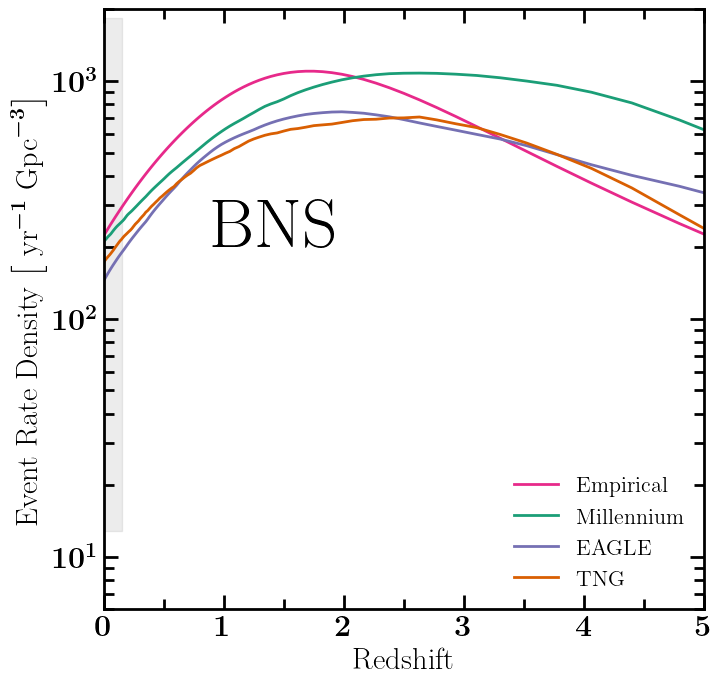

In [29]:
#obs_path = "../data/observations/BNS.csv"
#obs = pd.read_csv(obs_path, delimiter=",")
fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes([0, 0, 1, 1])

set_axis(ax)

for SFH in SFH_names:
    if SFH == "empirical":
        ax.plot(redshift, np.sum(event_rates[SFH]["BNS"], axis=0), label="Empirical", color=colours[SFH], lw=2)
    elif SFH == "millimillennium":
        ax.plot(redshift, np.sum(event_rates[SFH]["BNS"], axis=0), label="Millennium", color=colours[SFH], lw=2)
    else:
        ax.plot(redshift, np.sum(event_rates[SFH]["BNS"], axis=0), label=SFH, color=colours[SFH], lw=2)


    
plt.legend(frameon=False, fontsize=16, loc=4)
plt.xlabel("Redshift")
plt.ylabel(r"Event Rate Density $\left[\textrm{ yr}^{-1} \textrm{ Gpc}^{-3}\right]$")
plt.yscale("log")
plt.xlim(0,5)
ax.set_ylim(6e0, 2e3)

obs = observations['BNS']

# Non-evolving merger rate
top = np.max(obs['rate'][1:4]+obs['upper_rate'][1:4])
bottom = np.min(obs['rate'][1:4]-obs['lower_rate'][1:4])

ax.fill_between([0,0.15], 
                (top)*h**3,
                (bottom)*h**3, 
                alpha=0.15, 
                color="grey")

ax.text(0.9, 2e2, r"BNS", fontsize=50)

# plt.savefig("images/png/BNS_obs.png", dpi=150, bbox_inches='tight')
# plt.savefig("images/pdf/BNS_obs.pdf", bbox_inches='tight')

plt.show()